<a href="https://colab.research.google.com/github/Akhil-2019/ML-Mini-projects/blob/main/Deep_Convolutional_Neural_Networks_in_Tensorflow_(MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing deep convolutional neural networks (CNNs) in Keras, and applying them to Image Analysis

In [23]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [41]:
# https://robertbrucecarter.com/writing/2020/06/setting-your-working-directory-to-google-drive-in-a-colab-notebook/

import os 

# Set your working directory to a folder in your Google Drive. This way, if your notebook times out,
# your files will be saved in your Google Drive!

# the base Google Drive directory
root_dir = "/content/drive/My Drive/"

# choose where you want your project files to be saved
project_folder = "Colab Notebooks/ML Projects (LJMU)/Lab Sessions/"

def create_and_set_working_directory(project_folder):
  # check if your project folder exists. if not, it will be created.
  if os.path.isdir(root_dir + project_folder) == False:
    os.mkdir(root_dir + project_folder)
    print(root_dir + project_folder + ' did not exist but was created.')

  # change the OS to use your project folder as the working directory
  os.chdir(root_dir + project_folder)


In [42]:
# create a test file to make sure it shows up in the right place
!touch 'new_file_in_working_directory.txt'

In [43]:
print('\nYour working directory was changed to ' + root_dir + project_folder + \
        "\n\nAn empty text file was created there. You can also run !pwd to confirm the current working directory." )


Your working directory was changed to /content/drive/My Drive/Colab Notebooks/ML Projects (LJMU)/Lab Sessions/

An empty text file was created there. You can also run !pwd to confirm the current working directory.


In [45]:
create_and_set_working_directory(project_folder)

In [46]:
!pwd

/content/drive/My Drive/Colab Notebooks/ML Projects (LJMU)/Lab Sessions


In [25]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

## Dataset
We will use the MNIST dataset. In this occassion the images won't be flattened prior to be used in the network, but they will be inputed as they are (images or arrays).

Download the MNIST dataset from Keras:

In [7]:
from tensorflow.keras.datasets import mnist
(X_train_img, y_train_img), (X_test_img, y_test_img) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [8]:

print('X_train_img dimensions: ', X_train_img.shape)
print('y_train_img dimensions: ', y_train_img.shape)
print('X_test_img dimensions: ', X_test_img.shape)
print('y_test_img dimensions: ', y_test_img.shape)

X_train_img dimensions:  (60000, 28, 28)
y_train_img dimensions:  (60000,)
X_test_img dimensions:  (10000, 28, 28)
y_test_img dimensions:  (10000,)


MNIST images are all pre-aligned (e.g. each image only contains a hand-drawn digit). In addition, the images all have the same square size of 28×28 pixels, and all are greyscale.

CNN models (2D-CNNs, more precisely) takes 4D arrays as inputs: samples, 2D image coordinates, and channels. Colour RGB images have 3 channels (Red, Green and Blue), whilst greyscale images, 1 channel only. Therefore, we must reshape the data arrays to have a single channel:

In [9]:
X_train = X_train_img.reshape((X_train_img.shape[0], 28, 28, 1))
X_test = X_test_img.reshape((X_test_img.shape[0], 28, 28, 1))
print('X_train dimensions: ', X_train.shape)
print('X_test dimensions: ', X_test.shape)

X_train dimensions:  (60000, 28, 28, 1)
X_test dimensions:  (10000, 28, 28, 1)


Classes in y_train and y_test are represented as unique integers:  0…9
 . We can, therefore, use a one hot encoding for the class element of each sample, transforming the integer into a 10 element binary vector with a 1 for the index of the class value, and 0 values for all other classes. We can achieve this with the to_categorical() utility function:

In [10]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train_img)
y_test = to_categorical(y_test_img)
y_train[0:5,]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

Now, we should proceed with the data normalisation. As we know pixel values should go from 0 to 255, sacaling the data requires dividing the arrays by 255. The data values are integers, therfore we must convert to reals first.

In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

## Building the Model

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten

In [13]:
model1 = Sequential()
model1.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model1.add(MaxPool2D((2,2)))
model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(Dense(10, activation='softmax'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               2769408   
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 2,774,858
Trainable params: 2,774,858
Non-trainable params: 0
____________________________________________

In [14]:
model1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [15]:
history = model1.fit(X_train, y_train,
          batch_size=128, epochs=50,
          verbose=2,
          validation_split=0.2)

Epoch 1/50
375/375 - 12s - loss: 0.1936 - accuracy: 0.9423 - val_loss: 0.0716 - val_accuracy: 0.9783 - 12s/epoch - 32ms/step
Epoch 2/50
375/375 - 1s - loss: 0.0572 - accuracy: 0.9823 - val_loss: 0.0530 - val_accuracy: 0.9843 - 1s/epoch - 4ms/step
Epoch 3/50
375/375 - 1s - loss: 0.0342 - accuracy: 0.9900 - val_loss: 0.0522 - val_accuracy: 0.9840 - 1s/epoch - 4ms/step
Epoch 4/50
375/375 - 1s - loss: 0.0218 - accuracy: 0.9934 - val_loss: 0.0509 - val_accuracy: 0.9858 - 1s/epoch - 4ms/step
Epoch 5/50
375/375 - 2s - loss: 0.0155 - accuracy: 0.9952 - val_loss: 0.0510 - val_accuracy: 0.9862 - 2s/epoch - 4ms/step
Epoch 6/50
375/375 - 2s - loss: 0.0089 - accuracy: 0.9976 - val_loss: 0.0467 - val_accuracy: 0.9870 - 2s/epoch - 5ms/step
Epoch 7/50
375/375 - 1s - loss: 0.0070 - accuracy: 0.9979 - val_loss: 0.0536 - val_accuracy: 0.9868 - 1s/epoch - 4ms/step
Epoch 8/50
375/375 - 1s - loss: 0.0060 - accuracy: 0.9982 - val_loss: 0.0619 - val_accuracy: 0.9844 - 1s/epoch - 4ms/step
Epoch 9/50
375/375 - 

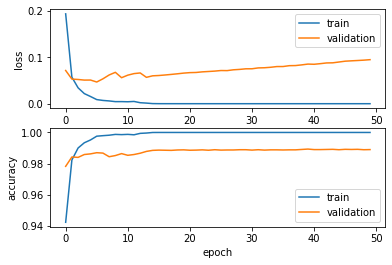

In [16]:
def plot_history(history):
    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'])
    plt.subplot(2,1,2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'])
    return;

plot_history(history)

## Predicting new cases

In [17]:
preds_prob = model1.predict(X_test[0:100,:,:,:])
preds_class = np.argmax(preds_prob, axis=1)
preds_class

4/4 [==============================] - 0s 15ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 5, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9])

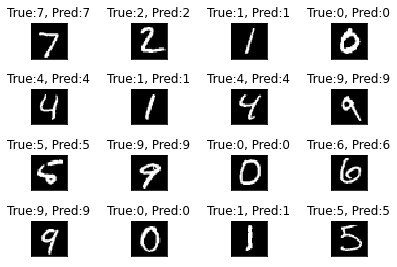

In [18]:
plt.figure(facecolor='w')
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.tight_layout()
  plt.imshow(X_test_img[i], cmap='gray', interpolation='none')
  plt.title("True:{}, Pred:{}".format(y_test_img[i],preds_class[i]))
  plt.xticks([])
  plt.yticks([])

## Model Performance

In [19]:
test_scores_model1 = model1.evaluate(X_test, y_test, verbose=0)
print("Test loss model 1:", test_scores_model1[0])
print("Test accuracy model 1:", test_scores_model1[1])
train_scores_model1 = model1.evaluate(X_train, y_train, verbose=0)
print("Train loss model 1:", train_scores_model1[0])
print("Train accuracy model 1:", train_scores_model1[1])

Test loss model 1: 0.07941501587629318
Test accuracy model 1: 0.9890999794006348
Train loss model 1: 0.01897151581943035
Train accuracy model 1: 0.9977999925613403


## Model variant
We will proceed with implementing a variant of the above model. It will contain further convolutional + max-pooling layers and remove the hidden dense layer.

In [20]:
model1 = Sequential()
model1.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model1.add(MaxPool2D((2,2)))
model1.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model1.add(MaxPool2D((2,2)))
model1.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model1.add(MaxPool2D((2,2)))
model1.add(Flatten())
model1.add(Dense(10, activation='softmax'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 1, 1, 32)        

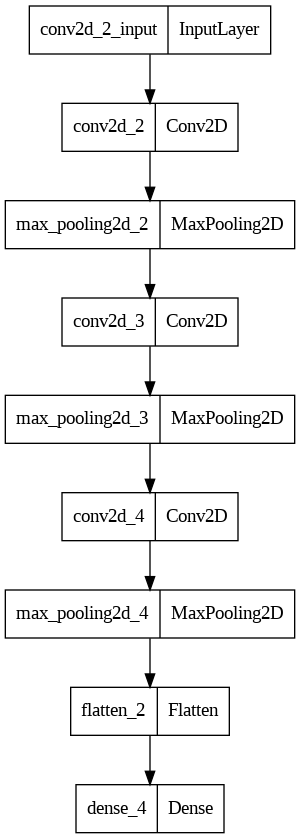

In [47]:
from tensorflow.keras.utils import plot_model
plot_model(model1)

In [22]:
model1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

Before we train the model, we can find useful to save the initial weights so they can be reuse later on.
We use get_weights and set_weights functions to this aim.

In [27]:
initial_weights = model1.get_weights()

In [28]:
history = model1.fit(X_train, y_train,
          batch_size=128, epochs=50,
          verbose=2,
          validation_split=0.2)

Epoch 1/50
375/375 - 3s - loss: 0.5212 - accuracy: 0.8463 - val_loss: 0.1877 - val_accuracy: 0.9415 - 3s/epoch - 9ms/step
Epoch 2/50
375/375 - 2s - loss: 0.1639 - accuracy: 0.9498 - val_loss: 0.1335 - val_accuracy: 0.9607 - 2s/epoch - 5ms/step
Epoch 3/50
375/375 - 2s - loss: 0.1260 - accuracy: 0.9609 - val_loss: 0.1181 - val_accuracy: 0.9655 - 2s/epoch - 6ms/step
Epoch 4/50
375/375 - 2s - loss: 0.1039 - accuracy: 0.9680 - val_loss: 0.1011 - val_accuracy: 0.9706 - 2s/epoch - 4ms/step
Epoch 5/50
375/375 - 2s - loss: 0.0907 - accuracy: 0.9728 - val_loss: 0.0934 - val_accuracy: 0.9722 - 2s/epoch - 4ms/step
Epoch 6/50
375/375 - 1s - loss: 0.0795 - accuracy: 0.9759 - val_loss: 0.0805 - val_accuracy: 0.9768 - 1s/epoch - 4ms/step
Epoch 7/50
375/375 - 1s - loss: 0.0707 - accuracy: 0.9785 - val_loss: 0.0786 - val_accuracy: 0.9769 - 1s/epoch - 4ms/step
Epoch 8/50
375/375 - 2s - loss: 0.0668 - accuracy: 0.9793 - val_loss: 0.0823 - val_accuracy: 0.9777 - 2s/epoch - 4ms/step
Epoch 9/50
375/375 - 2s 

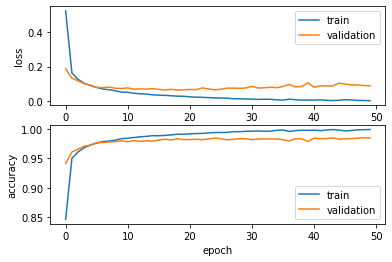

In [30]:
plot_history(history)

## Early stopping
We can implement early stopping in Tensorflow by the use of *callbacks*, which are functions that are called during training.

* For instance, the code below implements a basic `EarlyStopping` function that uses the default argument values. Please refer to the Tensorflow documentation for details about the `EarlyStopping` arguments and their meaning.

In [31]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()

* To train the model again, we should use the initial weights we saved before. If we fail to do this, `fit` function would use the weight values from the last training iteration.
* We use `set_weights` function to reset the weights to the initial ones:

In [32]:
# Now, we can train the model again but using early stopping this time.
model1.set_weights(initial_weights)

In [33]:
history = model1.fit(X_train, y_train,
          batch_size=128, epochs=100,
          verbose=2,
          validation_split=0.2,
          callbacks=[early_stopping])

Epoch 1/100
375/375 - 3s - loss: 0.4594 - accuracy: 0.8558 - val_loss: 0.1602 - val_accuracy: 0.9511 - 3s/epoch - 8ms/step
Epoch 2/100
375/375 - 3s - loss: 0.1473 - accuracy: 0.9549 - val_loss: 0.1241 - val_accuracy: 0.9614 - 3s/epoch - 7ms/step


In [34]:
# a better version of early stopping
custom_early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=8, 
    min_delta=0.001
)

In [35]:
model1.set_weights(initial_weights)
history = model1.fit(X_train, y_train,
          batch_size=128, epochs=100,
          verbose=2,
          validation_split=0.2,
          callbacks=[custom_early_stopping])

Epoch 1/100
375/375 - 2s - loss: 0.6140 - accuracy: 0.8139 - val_loss: 0.1671 - val_accuracy: 0.9526 - 2s/epoch - 4ms/step
Epoch 2/100
375/375 - 2s - loss: 0.1561 - accuracy: 0.9519 - val_loss: 0.1337 - val_accuracy: 0.9598 - 2s/epoch - 4ms/step
Epoch 3/100
375/375 - 1s - loss: 0.1149 - accuracy: 0.9643 - val_loss: 0.1072 - val_accuracy: 0.9677 - 1s/epoch - 4ms/step
Epoch 4/100
375/375 - 2s - loss: 0.0993 - accuracy: 0.9688 - val_loss: 0.0975 - val_accuracy: 0.9712 - 2s/epoch - 4ms/step
Epoch 5/100
375/375 - 2s - loss: 0.0856 - accuracy: 0.9737 - val_loss: 0.0868 - val_accuracy: 0.9756 - 2s/epoch - 6ms/step
Epoch 6/100
375/375 - 2s - loss: 0.0770 - accuracy: 0.9759 - val_loss: 0.0813 - val_accuracy: 0.9771 - 2s/epoch - 5ms/step
Epoch 7/100
375/375 - 1s - loss: 0.0711 - accuracy: 0.9779 - val_loss: 0.0831 - val_accuracy: 0.9748 - 1s/epoch - 4ms/step
Epoch 8/100
375/375 - 2s - loss: 0.0667 - accuracy: 0.9794 - val_loss: 0.0757 - val_accuracy: 0.9789 - 2s/epoch - 4ms/step
Epoch 9/100
375/

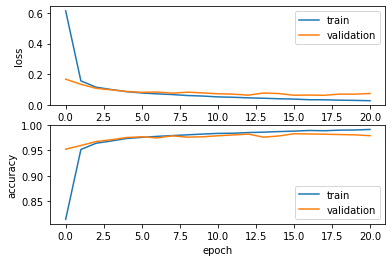

In [36]:
plot_history(history)